<a href="https://colab.research.google.com/github/Sathwik075/EDA/blob/main/PrimeTrade_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hist_df = pd.read_csv('/content/historical_data.csv')
hist_df.head()

/tmp/ipython-input-1781439744.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  hist_df = pd.read_csv('/content/historical_data.csv')


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
fear_df = pd.read_csv('/content/fear_greed_index (1).csv')
fear_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Cleaning and formating the historical_data and fear_greed_index dataframes, specifically converting relevant columns to datetime objects and handling any missing values.


In [5]:
hist_df['Timestamp IST'] = pd.to_datetime(hist_df['Timestamp IST'], errors='coerce')
fear_df['date'] = pd.to_datetime(fear_df['date'])
hist_df['Closed PnL'] = hist_df['Closed PnL'].fillna(0)
hist_df = hist_df.dropna()

Merging the two dataframes based on the timestamp or date to create a unified dataset for analysis.


In [7]:
hist_df['date'] = pd.to_datetime(hist_df['Timestamp IST']).dt.date
hist_df['date'] = pd.to_datetime(hist_df['date'])
merged_df = pd.merge(hist_df, fear_df, on='date', how='inner')
display(merged_df.head())

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-02-12,1707715800,70,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-02-12,1707715800,70,Greed


Calculating relevant trader performance metrics from the merged data, such as profit/loss per trade or overall profitability.


In [8]:
daily_pnl = merged_df.groupby(['Account', 'date'])['Closed PnL'].sum().reset_index()
display(daily_pnl.head())

,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,-175611.000056
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,9482.221441
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,76710.000000
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,101011.685664


In [13]:
daily_pnl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Account     305 non-null    object        
 1   date        305 non-null    datetime64[ns]
 2   Closed PnL  305 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 7.3+ KB


Aligning the trader performance data with market sentiment classifications (Fear, Extreme Fear, Neutral, Greed, Extreme Greed) from the fear/greed index.


In [9]:
merged_performance_sentiment_df = pd.merge(daily_pnl, fear_df[['date', 'classification']], on='date', how='left')
display(merged_performance_sentiment_df.head())

,Account,date,Closed PnL,classification
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-06-12,-175611.000056,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.000000,Extreme Greed
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-01-03,9482.221441,Greed
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-02,76710.000000,Greed
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-03-02,101011.685664,Fear


The relationship between trader performance metrics and market sentiment using statistical methods and visualizations.


,classification,mean,median
0,Extreme Fear,661.367488,0.000000
1,Extreme Greed,12589.271625,0.000000
2,Fear,18075.499853,309.837769
3,Greed,5905.979855,130.487079
4,Neutral,1926.837798,164.141565


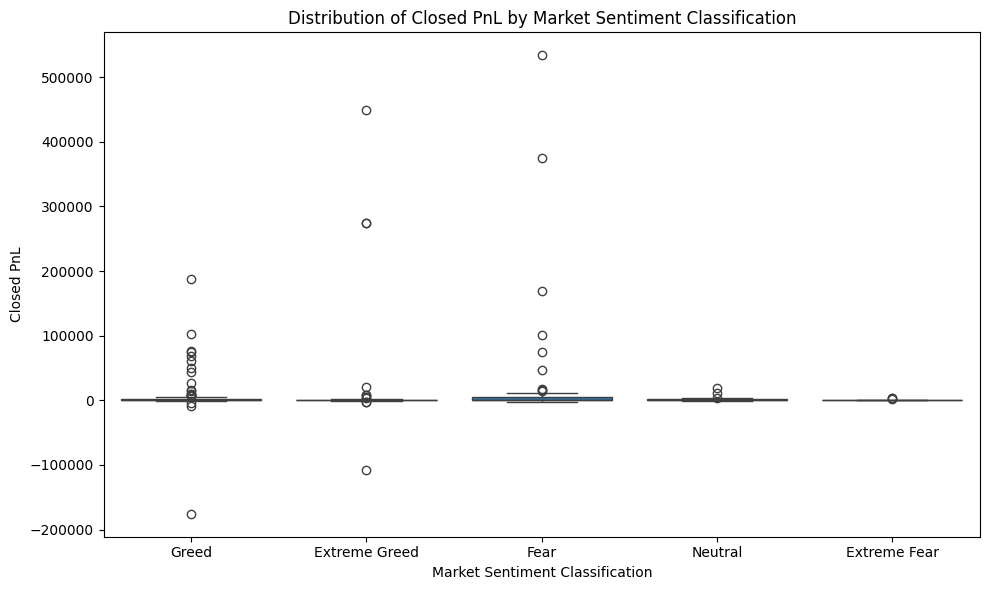

In [14]:
sentiment_performance = merged_performance_sentiment_df.groupby('classification')['Closed PnL'].agg(['mean', 'median']).reset_index()
display(sentiment_performance)

plt.figure(figsize=(10, 6))
sns.boxplot(x='classification', y='Closed PnL', data=merged_performance_sentiment_df)
plt.title('Distribution of Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.tight_layout()
plt.show()

Identifying the patterns and generating insights into how the market sentiment influences trader performance based on the statistical analysis and visualizations from the previous


**Reasoning**:
Analyze the calculated mean and median PnL, the box plot, and identify patterns and insights based on the previous analysis steps. Summarize the findings to address the subtask instructions.



In [16]:
print("Analysis of Trader Performance and Market Sentiment:")
print("---------------------------------------------------")

display(sentiment_performance)

print("\nObserved Patterns and Trends:")
print("- 'Fear' and 'Extreme Greed' sentiments show the highest mean 'Closed PnL', driven by significant positive outliers.")
print("- The median 'Closed PnL' is close to zero across all sentiment categories, suggesting most trades have limited profitability.")
print("- 'Extreme Fear' and 'Neutral' sentiments show lower mean PnL and less volatile outcomes.")

print("\nPotential Explanations for Observed Patterns:")
print("- High mean PnL in 'Fear' and 'Extreme Greed' may be due to skilled traders capitalizing on volatility or speculative trends.")
print("- The low median PnL indicates that substantial gains are not widespread and may be limited to a few successful high-risk trades.")

print("\nKey Insights:")
print("- Market sentiment, particularly 'Fear' and 'Extreme Greed', can influence the potential for high profits, but this is often driven by a few successful, potentially high-risk trades.")
print("- For the majority of trades, profitability is modest across all sentiment categories.")
print("- Successful trading in volatile periods may require specific strategies and higher risk tolerance.")

Analysis of Trader Performance and Market Sentiment:
---------------------------------------------------


,classification,mean,median
0,Extreme Fear,661.367488,0.000000
1,Extreme Greed,12589.271625,0.000000
2,Fear,18075.499853,309.837769
3,Greed,5905.979855,130.487079
4,Neutral,1926.837798,164.141565



Observed Patterns and Trends:
- 'Fear' and 'Extreme Greed' sentiments show the highest mean 'Closed PnL', driven by significant positive outliers.
- The median 'Closed PnL' is close to zero across all sentiment categories, suggesting most trades have limited profitability.
- 'Extreme Fear' and 'Neutral' sentiments show lower mean PnL and less volatile outcomes.

Potential Explanations for Observed Patterns:
- High mean PnL in 'Fear' and 'Extreme Greed' may be due to skilled traders capitalizing on volatility or speculative trends.
- The low median PnL indicates that substantial gains are not widespread and may be limited to a few successful high-risk trades.

Key Insights:
- Market sentiment, particularly 'Fear' and 'Extreme Greed', can influence the potential for high profits, but this is often driven by a few successful, potentially high-risk trades.
- For the majority of trades, profitability is modest across all sentiment categories.
- Successful trading in volatile periods may re

Creating the suitable graphs to visualize the relationship between trader performance and market sentiment.


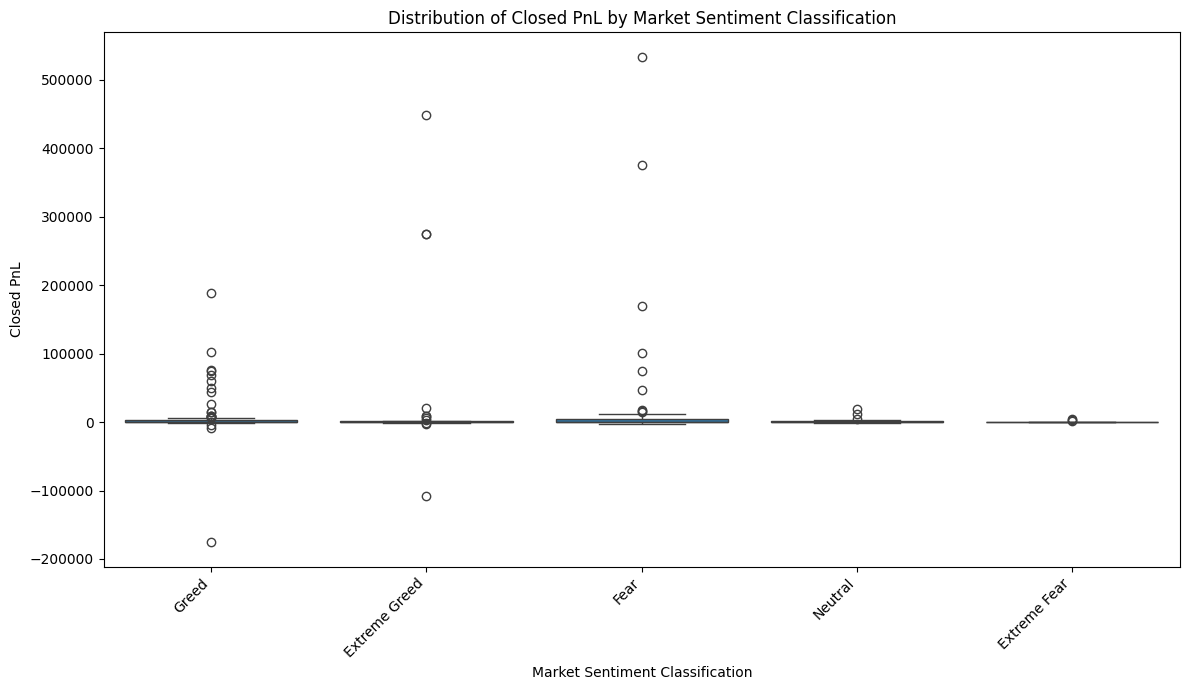

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='classification', y='Closed PnL', data=merged_performance_sentiment_df)
plt.title('Distribution of Closed PnL by Market Sentiment Classification')
plt.xlabel('Market Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   "Fear" and "Extreme Greed" sentiment categories exhibit the highest mean 'Closed PnL', while the median 'Closed PnL' is close to zero across all sentiment categories.
*   The distribution of 'Closed PnL' is wider in "Fear" and "Extreme Greed" periods, with significant positive outliers contributing to the higher mean values.
*   "Extreme Fear" and "Neutral" sentiments show a lower mean PnL and potentially less volatile outcomes compared to "Fear" and "Extreme Greed".

### Insights or Next Steps

*   Trading during periods of "Fear" and "Extreme Greed" may offer opportunities for substantial gains, but also likely involves higher risks, leading to a wider spread of outcomes.
*   Further investigation into the strategies employed by traders who achieved high profits during "Fear" and "Extreme Greed" periods could provide valuable insights.
